Problem one
Solid oxide fuel cells (SOFC) involve a solid ceramic electrolyte. Advantages of SOFCs include fuel flexibility, use of cheaper catalysts, high power densities, and high quality waste heat for cogeneration. Physically, a SOFC conducts $\mathrm{O}^{2-}$ anions through a solid electrolyte, replacing the proton and hydroxide conductors we discussed in class. In order to be conductive for $\mathrm{O}^{2-}$ ions, these cells must be operated at high temperatures.

c) Using values for the thermodynamics of each species found in NIST, write out an expression for the open circuit potential of the cell as a function of temperature. Please state all assumptions clearly.\\

d)
So the total potential will consist of the difference petering the Nernst potential and the resistive losses, so we have:
\begin{align}
    V_{cell} &= E_{cell} - iR = E_{cell} - i \frac{L}{\sigma A} = E_{cell} - i \frac{L}{A} \frac{1}{A \cdot \exp \left[\frac{E}{R}\left(\frac{1}{T_{0}}-\frac{1}{T}\right)\right]} \\
\end{align}
And we have $L = 150 \times 10^{-4} cm, i = 500 \frac{mA}{cm^{2}}\times \frac{1 A}{1000 mA}, A = 0.14 \frac{S}{cm}, E = 75000 \frac{J}{mol}, R = 8.314 \frac{J}{K \cdot mol}, T_0 = 1273 K$.

e) Plot of cell voltage as a function of temperature. What temperature does the maximum potential occur at and what is that potential? How does this optimal temperature change for: (i) $1 \mathrm{~A} / \mathrm{cm} 2$, (ii) $A=0.014 \mathrm{~S} / \mathrm{cm}$, (iii) $A=1.4 \mathrm{~S} / \mathrm{cm}$\\

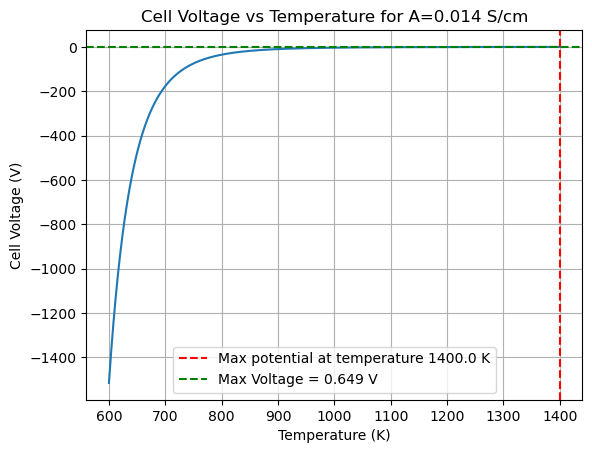

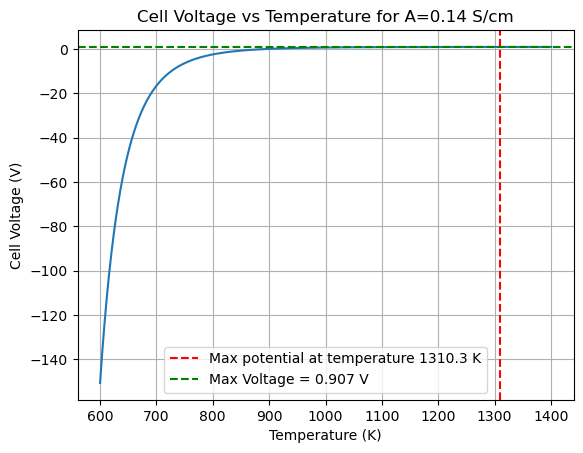

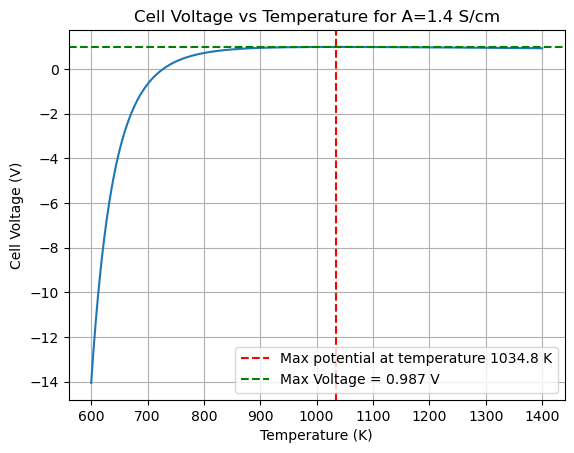

In [6]:
# I want to determine the delta_H and delta_S for the above reaction so that I can make an expression delta_G as a function of temperature
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np

T = sp.symbols('T')
delta_H = 2 * (-241.8) - 2 * 0 - 0
delta_S = 2 * 188.7 - 2 * 130.6 - 205.2
delta_G = delta_H - T * delta_S / 1000
nelectrons = 4
faradays_constant = 96.485  # C/mol
OCV = -delta_G / nelectrons / faradays_constant  # in volts
# sp.pprint(sp.simplify(OCV))
L = 150e-4  # cm
i = 500e-3  # A/cm^2
E = 75000  # J/mol
R = 8.314  # J/K*mol
T0 = 1273  # K
A = [0.014, 0.14, 1.4]  # S/cm
for A in A:
    sigma = A * sp.exp(E / R * (1 / T0 - 1 / T))
    R_internal = L / sigma  # ohm*cm^2
    V_cell = OCV - i * R_internal
    # print(sp.simplify(V_cell))  # in volts
    V_cell_func = sp.lambdify(T, V_cell, 'numpy')
    T_vals = np.linspace(600, 1400, 1000)
    V_vals = V_cell_func(T_vals)
    plt.plot(T_vals, V_vals)
    plt.title(f'Cell Voltage vs Temperature for A={A} S/cm')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Cell Voltage (V)')
    plt.grid()
    plt.axvline(x= T_vals[np.argmax(V_vals)], color='r', linestyle='--', label=f'Max potential at temperature {T_vals[np.argmax(V_vals)]:.1f} K')
    plt.axhline(y= np.max(V_vals), color='g', linestyle='--', label=f'Max Voltage = {np.max(V_vals):.3f} V')    
    plt.legend()
    plt.show()





\section*{Problem 2. Corrosion Currents}
Under some conditions, corrosion can refer to a spontaneous chemical reaction that results from a neutral combination of Faradaic reactions (redox couple) at the same electrode. Since no electron must pass through the external circuit, corrosion can occur under open circuit conditions. For example, in a lead-acid battery, the corrosion reaction

$$
\mathrm{Pb}^{2+}+\mathrm{SO}_{4}^{2-} \rightarrow \mathrm{PbSO}_{4}(\mathrm{~s})
$$

can occur at both electrodes. At the anode, the half reaction


\begin{equation*}
\mathrm{Pb}(s)+\mathrm{SO}_{4}^{2-} \rightarrow \mathrm{PbSO}_{4}(s)+2 e^{-}, \phi_{1}^{\Theta}=-0.356 \mathrm{~V} \tag{1}
\end{equation*}


couples to lead electrodeposition,


\begin{equation*}
P b^{2+}+2 e^{-} \rightarrow P b(s), \phi_{2}^{\Theta}=-0.126 V \tag{2}
\end{equation*}


and at the cathode, the half reaction


\begin{equation*}
\mathrm{PbO}_{2}(s)+\mathrm{SO}_{4}^{2-}+4 \mathrm{H}^{+}+2 e^{-} \rightarrow \mathrm{PbSO}_{4}(s)+2 \mathrm{H}_{2} \mathrm{O}, \phi_{3}^{\Theta}=1.685 \mathrm{~V} \tag{3}
\end{equation*}


couples to lead oxide electrodeposition,


\begin{equation*}
\mathrm{Pb}^{2+}+2 \mathrm{H}_{2} \mathrm{O} \rightarrow \mathrm{PbO}_{2}(\mathrm{~s})+4 \mathrm{H}^{+}+2 e^{-}, \phi_{4}^{\Theta}=1.455 \mathrm{~V} \tag{4}
\end{equation*}


With these coupled reactions, there is no net passage of charge at each electrode despite the fact that charge transfer reactions are occurring at the electrode surface.\\

a) For each reaction ( $i=1,2,3,4$ ), relate the equilibrium electrode potential $\phi_{i}$ vs. the standard hydrogen electrode (SHE) to $p H, p\left[\mathrm{SO}_{4}^{2-}\right]$, and $p\left[\mathrm{~Pb}^{2+}\right]$, assuming that the other reactants have unit activities. ( $p[$ ion $]=-\log _{10}[$ ion $]$ )\\
b) Assume that the anode potential is $\phi_{a}=\frac{\phi_{1}+\phi_{2}}{2}$ and the cathode potential is $\phi_{c}=\frac{\phi_{3}+\phi_{4}}{2}$ (we will derive in the kinetics section!) What is the open circuit potential as a function of $p H, p\left[\mathrm{SO}_{4}^{2-}\right]$, and $p\left[\mathrm{~Pb}^{2+}\right]$.\\
c) If the sulfuric acid concentration reaches $\left[\mathrm{H}_{2} \mathrm{SO}_{4}\right]=3 \mathrm{M}$ and it fully dissociates at room temperature after the corrosion reactions equilibrate at both electrode, what is the lead ion concentration, $\left[\mathrm{Pb}^{2+}\right]$ ?


In [23]:
import sympy as sp

print(f'Part a')

# constants
T = 298  # K
R = 8.314  # J/mol*K
F = 96485  # C/mol

# symbolic variables
pSO42m, pPb2p, pHp = sp.symbols('pSO42m, pPb2p, pHp')

phi_refs = [-0.356, -0.126, 1.685, 1.455]
real_phi = []
for phi_ref in phi_refs:
    print(f'For phi_ref = {phi_ref} V:')
    # reaction quotient
    if phi_ref == -0.356:
        summ = pSO42m
    elif phi_ref == -0.126:
        summ = pPb2p#-sp.log(cPb2p)
    elif phi_ref == 1.685:
        summ = 4*pHp + pSO42m
    elif phi_ref == 1.455:
        summ = -4*pHp + pPb2p

    n = 2  # number of electrons transferred

    # nernst equation
    phi = phi_ref + (R * T * sp.ln(10) * summ) / (n * F) 
    sp.pprint(sp.simplify(phi))
    real_phi.append(phi)
print('------------------------------')
print(f'Part b')
# anode potential
phi1, phi2, phi3, phi4 = real_phi
phi_a = (phi1 + phi2) / 2
phi_c = (phi3 + phi4) / 2
OCV = phi_c - phi_a
sp.pprint(sp.simplify(OCV))
print('------------------------------')
print(f'Part c')
# Given data
H2SO4_conc = 3  # M
so42m_conc = H2SO4_conc  # assuming full dissociation
pSO42m_new = -sp.log(so42m_conc, 10)
hp_conc = 2 * H2SO4_conc  # from dissociation
pHp_new = -sp.log(hp_conc, 10)

# equilibrium: phi1 = phi2
equilibrium = sp.Eq(phi1.subs({pSO42m: pSO42m_new}), phi2.subs({pHp: pHp_new, pPb2p: pPb2p}))

# simplify first
equilibrium_simplified = sp.simplify(equilibrium)

# solve
solution = sp.solve(equilibrium_simplified, pPb2p)
print("Solution for pPb2p:", solution)

# convert to concentration
pb2_conc = [10**(-sol.evalf()) for sol in solution if sol.is_real and sol > 0]
print("Physical [Pb2+] (M):", pb2_conc)

# now phi3 = phi4
equilibrium2 = sp.Eq(phi3.subs({pHp: pHp_new, pSO42m: pSO42m_new}),
                     phi4.subs({pHp: pHp_new, pPb2p: pPb2p}))
equilibrium2_simplified = sp.simplify(equilibrium2)
solution2 = sp.solve(equilibrium2_simplified, pPb2p)
print("Solution for pPb2p from second equilibrium:", solution2)
# convert to concentration
pb2_conc2 = [10**(-sol.evalf()) for sol in solution2
                    if sol.is_real and sol > 0]
print("Physical [Pb2+] (M) from second equilibrium:", pb2_conc2)


Part a
For phi_ref = -0.356 V:
0.029563250007874⋅pSO42m - 0.356
For phi_ref = -0.126 V:
0.029563250007874⋅pPb2p - 0.126
For phi_ref = 1.685 V:
0.118253000031496⋅pHp + 0.029563250007874⋅pSO42m + 1.685
For phi_ref = 1.455 V:
-0.118253000031496⋅pHp + 0.029563250007874⋅pPb2p + 1.455
------------------------------
Part b
1.81100000000000
------------------------------
Part c
Solution for pPb2p: [-8.25705072589556]
Physical [Pb2+] (M): []
Solution for pPb2p from second equilibrium: [1.07759821338709]
Physical [Pb2+] (M) from second equilibrium: [0.0836376432285946]


\section{Problem 3. Electrochemical Pressurization}
In addition to driving otherwise unspontaneous reactions, such as water splitting, at room temperature, electrochemistry can also be used to promote difficult physical processes. An example of one such process is pressurization of gases, which can be done electrochemically with no moving parts.\\
\subsection{}
a) One of the most developed examples of this technology is electrochemical pressurization of hydrogen. The cell consists of two gas diffusion electrodes in contact with a proton conducting membrane. Write down the reactions occurring at the cathode and anode of the cell.\\
\subsubsection{Solution}
In this process there is no net overall chemical transformation; instead, we are just moving hydrogen from one side of the cell to the other, increasing its pressure. So
At the anode, we have:
\begin{equation}
    \mathrm{H}_{2}(p_\text{low}) \rightarrow 2 \mathrm{H}^{+} + 2 e^{-}
\end{equation}
At the cathode, we have:
\begin{equation}
    2 \mathrm{H}^{+} + 2 e^{-} \rightarrow \mathrm{H}_{2}(p_\text{high})
\end{equation}
\subsection{}
b) Derive the open circuit potential of the cell in analytic form using the fact that

$$
\mu_{i}=\mu_{i}^{0}+R T \ln \left(\frac{P_{i}}{P_{0}}\right),
$$

Where $P_{i}$ is the partial pressure of component $i$. This is valid if we assume that the gases are ideal. The hydrogen partial pressures at the anode and cathode must appear in your final expression. Note that $P_{0}$ is the reference potential, 1 bar.\\

\subsubsection{Solution}
We can use the equation
\begin{equation}
    \Delta G = \sum \nu_i \mu_i
\end{equation}
which will give
\begin{align}
    \Delta G &= \mu_{\mathrm{H}_{2}(p_\text{high})} - \mu_{\mathrm{H}_{2}(p_\text{low})} \\
    &= \mu_{\mathrm{H}_{2}}^{0} + RT \ln\left(\frac{P_\text{high}}{P_0}\right) - \mu_{\mathrm{H}_{2}}^{0} - RT \ln\left(\frac{P_\text{low}}{P_0}\right) \\
    &= RT \ln\left(\frac{P_\text{high}}{P_\text{low}}\right) = -nFE_{cell}
\end{align}
So we have
\begin{equation}
    E_{cell} = \frac{RT}{nF} \ln\left(\frac{P_\text{high}}{P_\text{low}}\right)
\end{equation}
with $n=2$.
\subsection{}
c) Typical electrochemical pressurizers can achieve hydrogen pressures of 5000 psia . Compute the minimum voltage that needs to be applied to the cell, assuming the hydrogen is fed at 15 psia , to drive the process. What is the electrical minimum work required to pressurize 1 mole of hydrogen? How does this compare to the work required by a conventional compressor (given by the formula below)?

$$
W_{\text {compress }}=n R T \ln \left(\frac{P_{f}}{P_{0}}\right)
$$
\subsubsection{Solution}

d) At one point, NASA was looking into creating an electrochemical oxygen compressor, which uses a wet proton conducting membrane as a separator. Because there has been interest in creating fuel and oxidizers off-Earth in recent years, this technology may need to be resurrected. Draw a schematic of the cell, denoting half reactions at the anode and cathode, the species that need to be fed to each electrode and motion of species through the membrane.

In [ ]:
import sympy as sp
# part c
R = 8.314  # J/K*mol
T = 298  # K (assumed room temperature)
F = 96485  # C/mol
n = 2  # number of electrons transferred

ratio = 5000 / 15
V_min = (R * T) / (n * F) * sp.ln(ratio)
print(V_min)
W_electrical = V_min * n * F  # J/mol
print(f'Electrical minimum work to pressurize 1 mole of hydrogen: {W_electrical:.2f} J/mol')
W_compressor = 2*R * T * sp.ln(ratio)  # J/mol
print(f'Work required by a conventional compressor: {W_compressor:.2f} J/mol')
print('------------------------------')
print(f'Part d')
# part d


0.0745844950862741
Electrical minimum work to pressurize 1 mole of hydrogen: 14392.57 J/mol
Work required by a conventional compressor: 28785.14 J/mol
------------------------------
Part d


0.0745844950862741
Electrical minimum work to pressurize 1 mole of hydrogen: 14392.57 J/mol
Work required by a conventional compressor: 28785.14 J/mol
------------------------------
Part d



\section{Problem 4. Vanadium Flow Battery}
Flow batteries store chemical energy and generate electricity by a redox reaction between vanadium ions dissolved in the electrolytes. For example, the vanadium flow battery is a type of rechargeable flow battery that employs vanadium ions in different oxidation states. The redox reactions of the vanadium flow battery during charge and discharge are described in the following figure.

$$
\begin{gathered}
V \mathrm{O}_{2}^{+}+2 \mathrm{H}^{+}+e^{-} \rightleftarrows V \mathrm{O}^{2+}+\mathrm{H}_{2} \mathrm{O} \\
V^{2+} \rightleftarrows V^{3+}+e^{-} \\
\hline V^{2+}+V \mathrm{O}_{2}^{+}+2 \mathrm{H}^{+} \rightleftarrows V \mathrm{O}^{2+}+V^{3+}+\mathrm{H}_{2} \mathrm{O}
\end{gathered}
$$
\subsection{}
(a) Given the thermodynamic data at 298.15 K in the table below, calculate the open circuit potential $U$ at standard state conditions.

\begin{center}
\begin{tabular}{ccc}
Formula & State & $\Delta \mathbf{G} \mathbf{f}(\mathbf{k J} / \mathbf{m o l})$ \\
$\mathrm{V}^{2+}$ & aq & -218 \\
$\mathrm{~V}^{3+}$ & aq & -251.3 \\
$\mathrm{VO}^{2+}$ & aq & -446.4 \\
$\mathrm{VO}_{2}{ }^{+}$ & aq & -587.0 \\
$\mathrm{H}_{2} \mathrm{O}$ & liq & -237.2 \\
$\mathrm{H}^{+}$ & aq & 0 \\
\end{tabular}
\end{center}
\subsubsection{Solution}

(b) Assuming all activity coefficients $\gamma_{i}$ are equal to one, the concentrations of $\mathrm{V}^{2+}, \mathrm{V}^{3+}, \mathrm{VO}^{2+}$, and $\mathrm{VO}_{2}{ }^{+}$are $0.1,0.1,1$, and 1 M , respectively, and the pH of the electrolyte is 1 , calculate the actual open circuit potential of the vanadium flow battery.\\
(c) You just joined a lab studying a vanadium battery. For your initial study, you are looking at a system with no flow, with the species at the concentrations described in part b within a 1 L volume. Plot the concentrations of all reactant species at a function of time if you discharge the battery (see diagram above) with a current of 1 A for 1 hour. Assume the electrolyte compartments are evenly mixed.\\
(d) Plot the equilibrium potential of the device as a function of time during the discharge process.


1.3463232626833186
------------------------------
Part b
1.2280702626518227
------------------------------
Part c


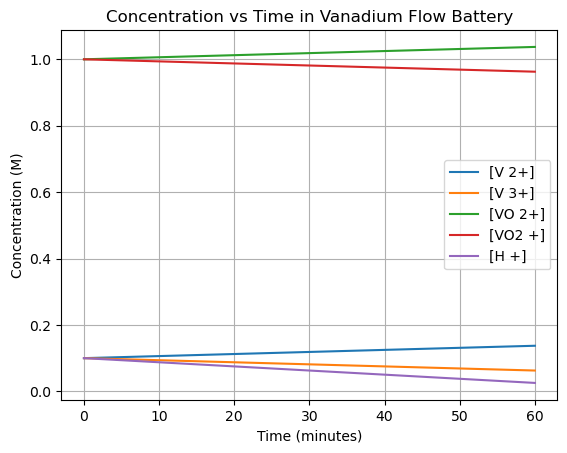

------------------------------
Part d


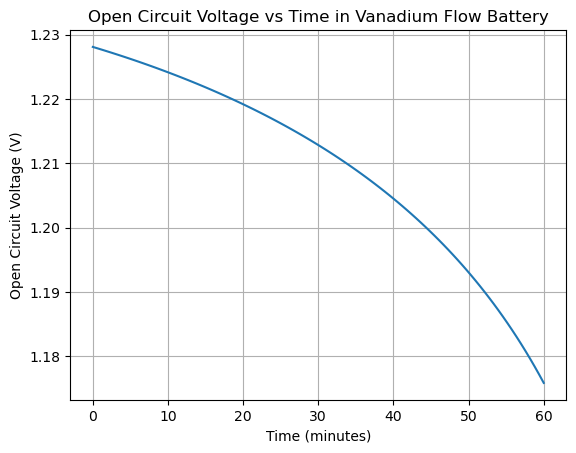

In [3]:
import numpy as np
# part a: reproduce table values
dG_V2_p = -218*1000 # J/mol
dG_V3_p = -251.3*1000 # J/mol
dG_vo_2p = -446.4*1000 # J/mol
dG_vo2_p = -587*1000 # J/mol
dG_h2o = -237.2*1000 # J/mol
dG_h_p = 0 # J/mol
F = 96485  # C/mol

U = -(dG_vo_2p + dG_V3_p + dG_h2o - dG_V2_p - dG_vo2_p) / (1 * F)
print(U)
print('------------------------------')
print(f'Part b')
# part b
c_v_2p = 0.1  # moles/L
c_v_3p = 0.1  # moles/L
c_vo_2p = 1 # moles/L
c_vo2_p = 1 # moles/L
pH = 1 
c_Hp = 10**(-pH)  # moles/L
sum = np.log(c_vo_2p) + np.log(c_v_3p) - np.log(c_v_2p) - np.log(c_vo2_p) - 2 * np.log(c_Hp)
R = 8.314  # J/K*mol
T = 298  # K (assumed room temperature)
F = 96485  # C/mol
act_U = U - R * T / F * sum
print(act_U)
print('------------------------------')
print(f'Part c')
from matplotlib import pyplot as plt
# part c
time = np.linspace(0, 3600, 100)  # seconds
current = 1 #A
charge = current * time  # C
moles = charge / F  # mol
volume = 1  # L
c_v_2p_new = c_v_2p + moles / volume
c_v_3p_new = c_v_3p - moles / volume
c_vo_2p_new = c_vo_2p + moles / volume
c_vo2_p_new = c_vo2_p - moles / volume
c_Hp_new = c_Hp - 2 * moles / volume
plt.plot(time/60, c_v_2p_new, label='[V 2+]')
plt.plot(time/60, c_v_3p_new, label='[V 3+]')
plt.plot(time/60, c_vo_2p_new, label='[VO 2+]')
plt.plot(time/60, c_vo2_p_new, label='[VO2 +]')
plt.plot(time/60, c_Hp_new, label='[H +]')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (M)')
plt.title('Concentration vs Time in Vanadium Flow Battery')
plt.legend()
plt.grid()
plt.show()
# part d
print('------------------------------')
print(f'Part d')
# part d
new_sum = np.log(c_vo_2p_new) + np.log(c_v_3p_new) - np.log(c_v_2p_new) - np.log(c_vo2_p_new) - 2 * np.log(c_Hp_new)
new_act_U = U - R * T / F * new_sum
plt.plot(time/60, new_act_U)
plt.xlabel('Time (minutes)')
plt.ylabel('Open Circuit Voltage (V)')
plt.title('Open Circuit Voltage vs Time in Vanadium Flow Battery')
plt.grid()
plt.show()